<a href="https://colab.research.google.com/github/Butnamfa/Customer-Churn-Prediction/blob/main/Colab_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Prepare Data

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1EloUeWDJd_m4yYQCO39Jy5ePKQexRSrz9ERdHs3CXno/export?format=csv"
churn_dataset = pd.read_csv(url)

In [ ]:
churn_dataset.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
print(churn_dataset.shape[0])

505207


# 2. data cleansing & Transformation

In [ ]:
churn_dataset.isna().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [ ]:
churn_dataset.dropna(inplace=True)

In [ ]:
churn_dataset.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
churn_dataset.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
churn_dataset['Gender'] = oe.fit_transform(churn_dataset[['Gender']])

In [ ]:
rank=['Basic','Standard','Premium']
oe = OrdinalEncoder(categories=[rank])
churn_dataset['Subscription Type']=oe.fit_transform(churn_dataset[['Subscription Type']])

In [ ]:
rank=['Monthly','Quarterly','Annual']
oe = OrdinalEncoder(categories=[rank])
churn_dataset['Contract Length']=oe.fit_transform(churn_dataset[['Contract Length']])

In [ ]:
churn_dataset.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0.0,39.0,14.0,5.0,18.0,1.0,2.0,932.0,17.0,1.0
1,65.0,0.0,49.0,1.0,10.0,8.0,0.0,0.0,557.0,6.0,1.0
2,55.0,0.0,14.0,4.0,6.0,18.0,0.0,1.0,185.0,3.0,1.0
3,58.0,1.0,38.0,21.0,7.0,7.0,1.0,0.0,396.0,29.0,1.0
4,23.0,1.0,32.0,20.0,5.0,8.0,0.0,0.0,617.0,20.0,1.0


In [ ]:
churn_dataset.to_csv('churn_dataset_cleans.csv')

# 3.การเเบ่งชุดข้อมูล train_data เเละ test_data

In [ ]:
import pandas as pd
url = "https://drive.google.com/uc?id=19yUb5DQcTT5LHdMBrgmEzpWcrjviZQan&export=download"
data_split = pd.read_csv(url)



In [ ]:
print(data_split.shape[0])

505206


In [ ]:
data_split.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30,0,39,14,5,18,1,2,932.0,17,1
1,65,0,49,1,10,8,0,0,557.0,6,1
2,55,0,14,4,6,18,0,1,185.0,3,1
3,58,1,38,21,7,7,1,0,396.0,29,1
4,23,1,32,20,5,8,0,0,617.0,20,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://drive.google.com/uc?id=19yUb5DQcTT5LHdMBrgmEzpWcrjviZQan&export=download"
data_split = pd.read_csv(url)

# Split the dataset into training and testing sets (70% train, 30% test)
train_data, test_data = train_test_split(data_split, test_size=0.3, random_state=42)

# Define file paths for saving
train_data_path = 'train_data.csv'
test_data_path = 'test_data.csv'

# Save the train and test datasets to CSV files
train_data.to_csv(train_data_path, index=False)
test_data.to_csv(test_data_path, index=False)

# Output the paths to the saved files
train_data_path, test_data_path


('train_data.csv', 'test_data.csv')

In [ ]:
print(train_data.shape[0])
print(test_data.shape[0])

353644
151562


# 4.Performing EDA and plotting Corelation matrix

In [ ]:
import pandas as pd
url_train = "https://drive.google.com/uc?id=125UA2113Fvd9GTlDkiyXyWgcEMiNWqDY&export=download"
url_test  = "https://drive.google.com/uc?id=1IHCWKBzrmGKMNRGjVRKcOQOpiXiM4aq2&export=download"

df_train = pd.read_csv(url_train)
df_test  = pd.read_csv(url_test)



In [ ]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,57,0,51,14,7,1,0,1,119.00,19,1
1,43,0,16,23,1,1,1,2,290.00,29,1
2,37,1,34,1,1,12,0,2,555.12,1,0
3,37,1,39,24,4,23,1,1,469.00,11,1
4,64,0,49,15,5,29,1,2,381.97,9,1


In [ ]:
df_test.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,54,1,5,20,1,3,0,1,421.00,15,1
1,62,1,38,28,7,8,2,1,577.00,11,0
2,44,0,16,21,1,11,0,1,792.85,6,0
3,22,1,57,12,2,7,2,1,590.65,7,0
4,24,0,26,2,4,23,1,0,811.00,14,1


In [ ]:
df_train['Churn'].value_counts()

,count
Churn,
1,196149
0,157495


In [ ]:
df_test['Churn'].value_counts()

,count
Churn,
1,84343
0,67219


In [ ]:
# นับจำนวนค่าที่ไม่ซ้ำกันในแต่ละคอลัมน์
for i in df_train.columns:
  dis = len(df_train[i].unique())
  print(f"{i} - {dis}")

Age - 48
Gender - 2
Tenure - 60
Usage Frequency - 30
Support Calls - 11
Payment Delay - 31
Subscription Type - 3
Contract Length - 3
Total Spend - 62155
Last Interaction - 30
Churn - 2


<Axes: xlabel='Age', ylabel='Count'>

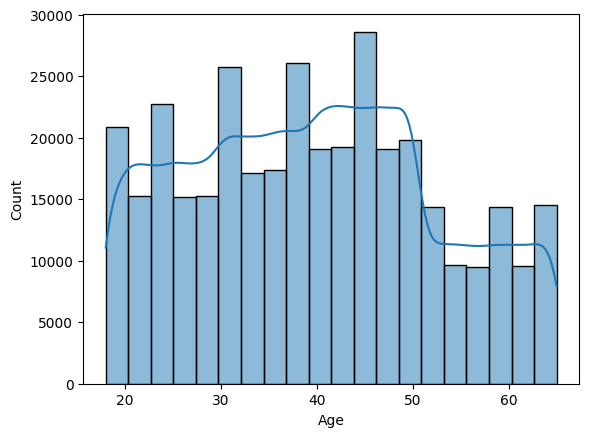

In [ ]:
import seaborn as sns
sns.histplot(df_train['Age'], bins=20, kde=True)

<Axes: xlabel='Tenure', ylabel='Count'>

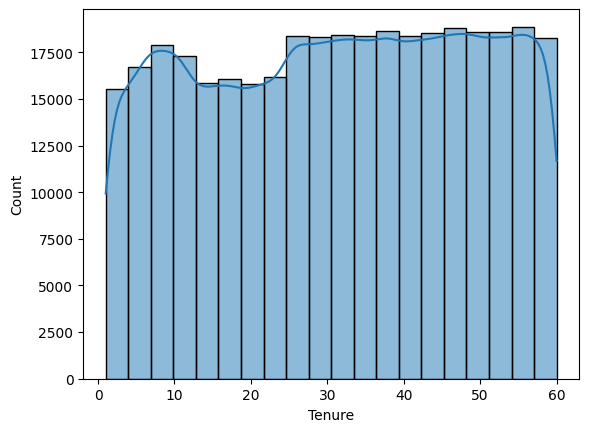

In [ ]:
sns.histplot(df_train['Tenure'], bins=20, kde=True)

<Axes: xlabel='Total Spend', ylabel='Count'>

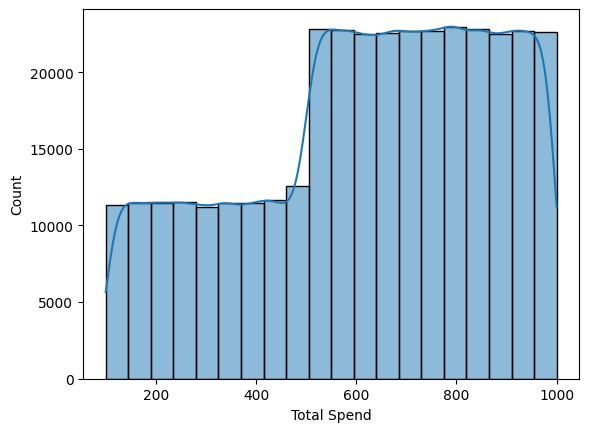

In [ ]:
sns.histplot(df_train['Total Spend'], bins=20, kde=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


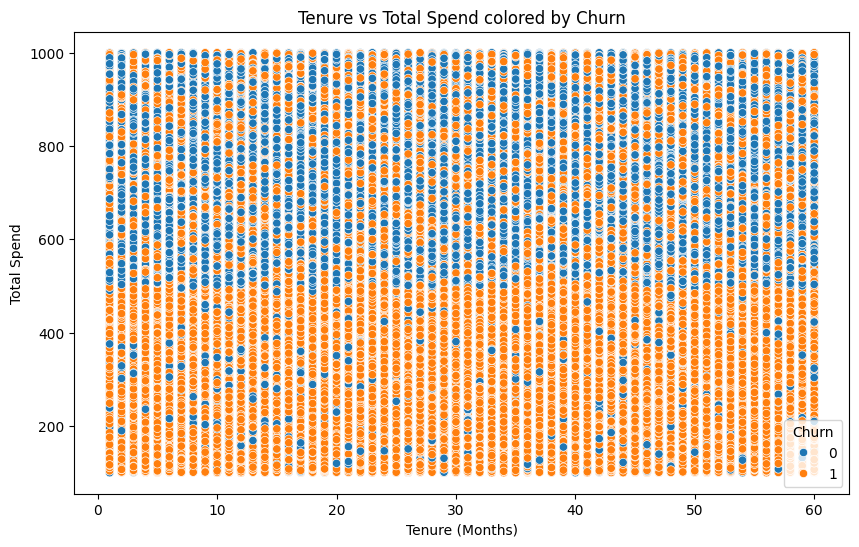

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='Total Spend', hue='Churn', data=df_train)

plt.title('Tenure vs Total Spend colored by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Spend')
plt.show()

<Axes: >

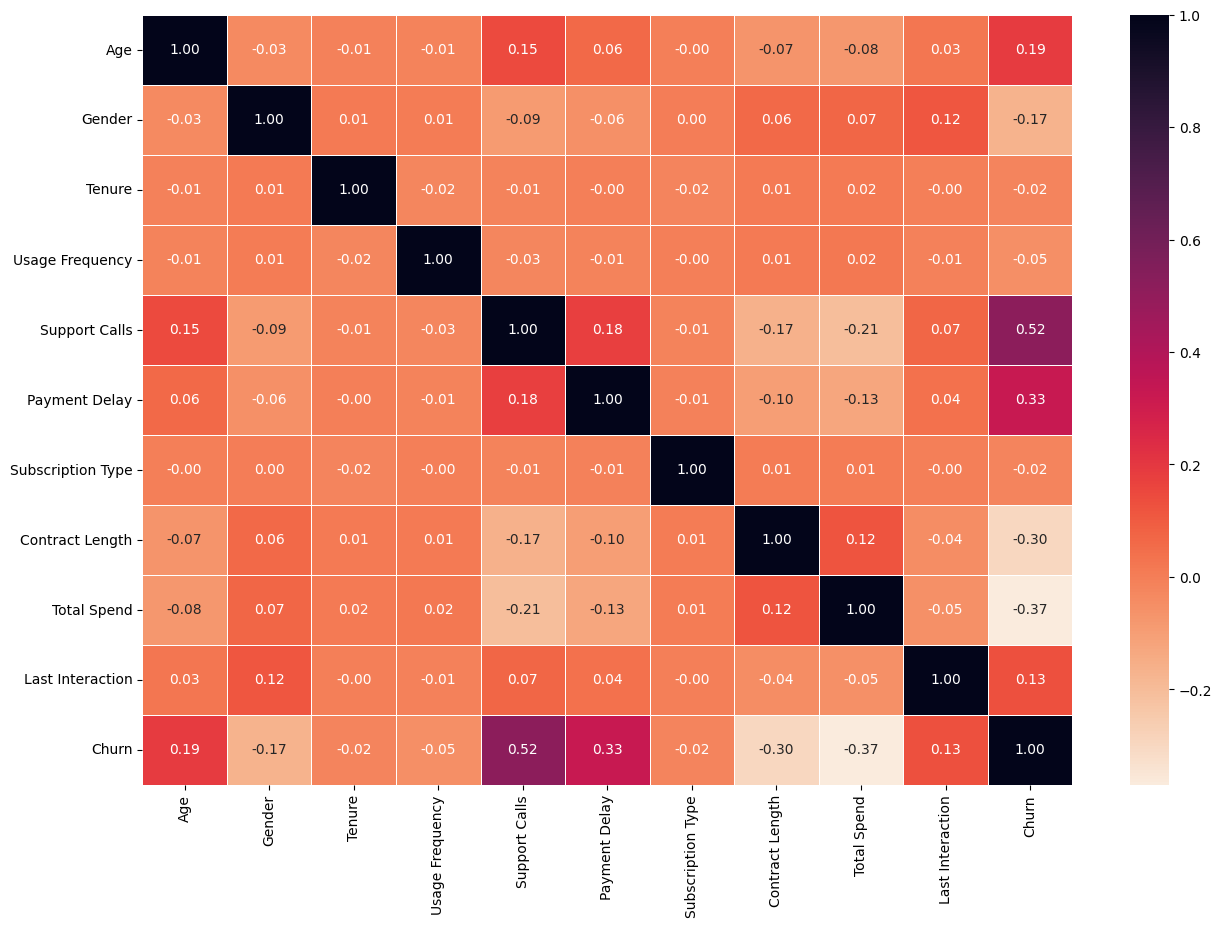

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

# Build model

# XGBoost model

In [ ]:
!pip install xgboost

In [ ]:
# แบ่งข้อมูล X และ y
X = df_train.drop(['Churn'], axis=1)
y = df_train['Churn']
X_test = df_test.drop(['Churn'], axis=1)
y_test = df_test['Churn']

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
# กำหนดพารามิเตอร์
param_grid = {
    'n_estimators': [50, 100],   # จำนวนต้นไม้ในโมเดล
    'max_depth': [3, 5, 7],      # ความลึกของต้นไม้
    'learning_rate': [0.1, 0.01] # อัตราการเรียนรู้
}

In [ ]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [ ]:
# Fit the model with training data
grid_search.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:28:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100]},
             verbose=1)

In [ ]:
# Get the best model
best_xgb = grid_search.best_estimator_

In [ ]:
# Predict on the test data
y_pred = best_xgb.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Print results
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Test Accuracy: 0.9331296763040868
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     67219
           1       0.90      0.99      0.94     84343

    accuracy                           0.93    151562
   macro avg       0.94      0.93      0.93    151562
weighted avg       0.94      0.93      0.93    151562



# LightGBM Model

In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier()

In [ ]:
# Define parameter grid for LightGBM
param_grid = {
    'n_estimators': [50, 100],       # จำนวนต้นไม้ในโมเดล
    'max_depth': [10, 20, -1],       # ความลึกของต้นไม้ (-1 หมายถึงไม่มีการจำกัดความลึก)
    'learning_rate': [0.01, 0.1],    # อัตราการเรียนรู้
    'num_leaves': [31, 50],          # จำนวนใบสูงสุดของแต่ละต้นไม้
    'min_child_samples': [20, 30],   # จำนวนตัวอย่างขั้นต่ำที่โหนดต้องมีเพื่อจะถูกแยกโหนดใหม่
}

In [ ]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [ ]:
# Fit the model with training data
grid_search.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 196149, number of negative: 157495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 353644, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554651 -> initscore=0.219481
[LightGBM] [Info] Start training from score 0.219481


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [10, 20, -1],
                         'min_child_samples': [20, 30],
                         'n_estimators': [50, 100], 'num_leaves': [31, 50]},
             verbose=1)

In [ ]:
# Get the best model
best_lgb = grid_search.best_estimator_

In [ ]:
# Predict on the test data
y_pred = best_lgb.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Print results
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 50}
Test Accuracy: 0.935155249996701
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     67219
           1       0.90      1.00      0.94     84343

    accuracy                           0.94    151562
   macro avg       0.95      0.93      0.93    151562
weighted avg       0.94      0.94      0.93    151562



# Save model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import joblib
# บันทึกโมเดลที่ถูกฝึกแล้วลงในไฟล์ .pkl
joblib.dump(best_lgb, '/content/drive/MyDrive/Colab Notebooks/miniproject/model/best_lgb_model.pkl')

print("Model saved successfully!")


Mounted at /content/drive
Model saved successfully!
